# MACHINE LEARNING PROJECT

## CUSTOMER CHURN PREDICTION

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score,precision_score,recall_score
# Import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# DATA UNDERSTANDING

In [3]:
df=pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(f" Dataset Shape: {df.shape}")
print(f"\n Data Types:\n{df.dtypes}")
print(f"\n Missing Values:\n{df.isnull().sum()}")

 Dataset Shape: (7043, 21)

 Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract 

### Insights:

Understand how many rows & columns are present.

# DATA CLEANING

In [4]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [5]:
print("\nUnique Values per Column:\n", df.nunique())


Unique Values per Column:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [6]:
print("\nRandom Sample Rows:\n", df.sample(5, random_state=42))


Random Sample Rows:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
185   1024-GUALD  Female              0     Yes         No       1   
2715  0484-JPBRU    Male              0      No         No      41   
3825  3620-EHIMZ  Female              0     Yes        Yes      52   
1807  6910-HADCM  Female              0      No         No       1   
132   8587-XYZSF    Male              0      No         No      67   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
185            No  No phone service             DSL                   No  ...   
2715          Yes               Yes              No  No internet service  ...   
3825          Yes                No              No  No internet service  ...   
1807          Yes                No     Fiber optic                   No  ...   
132           Yes                No             DSL                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \

In [7]:
# Convert 'TotalCharges' to numeric (it’s object type due to spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Check missing values again
print("\nMissing values after conversion:\n", df.isnull().sum())


Missing values after conversion:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
# Fill missing TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [10]:
# Check missing values again
print("\nMissing values after conversion:\n", df.isnull().sum())


Missing values after conversion:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Insights:

Identify whether this is a classification (Churn / No Churn) problem.

Detect missing values, incorrect data types, categorical vs numerical columns.

In [11]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
print("\nStatistical Summary (Numerical):\n", df.describe())


Statistical Summary (Numerical):
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


In [13]:
# Categorical and Numerical Columns

categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(include=['int64','float64']).columns

print("\nCategorical Columns:", list(categorical))
print("\nNumerical Columns:", list(numerical))


Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Univariate Analysis

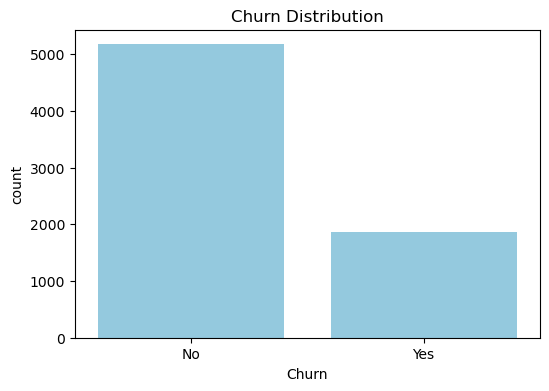

In [14]:
# Countplot for churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', color='skyblue')
plt.title('Churn Distribution')
plt.show()

### Insights:

The number of customers who did not churn (No) is significantly higher than those who churned (Yes).

Approximately:

~5,000+ customers stayed

~1,800 customers churned

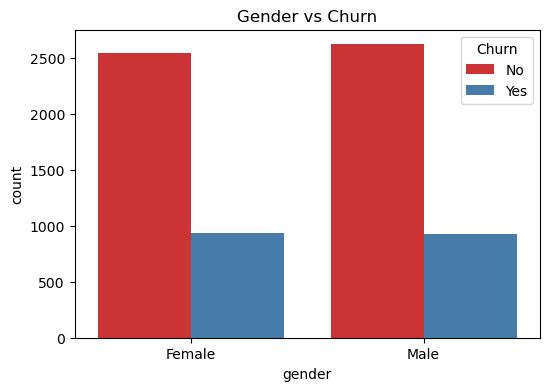

In [15]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set1')
plt.title('Gender vs Churn')
plt.show()

### INSIGHTS:

Churn rate is almost identical for both genders

Both Male and Female customers show very similar proportions of churn vs non-churn.

Example (approximate from plot):

Female: ~900 churned, ~2500 stayed

Male: ~900 churned, ~2600 stayed

### Numerical Distributions

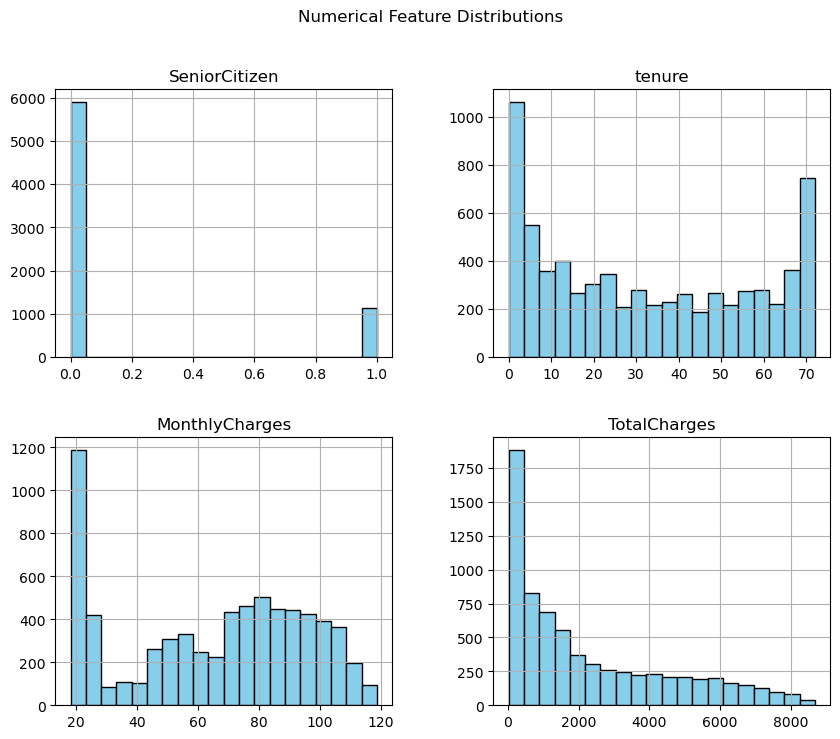

In [16]:
df[numerical].hist(figsize=(10,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Numerical Feature Distributions')
plt.show()

### INSIGHTS:

### 1. SeniorCitizen

This feature is binary (0 or 1).

Most values are 0, meaning the majority of customers are not senior citizens.

Very few customers fall into the senior citizen category.

### 2. Tenure (how long the customer has been with the company)

Distribution is U-shaped.

High number of customers at low tenure (0–6 months).

High number at very high tenure (~70 months).

Very few in the middle.


### 3. MonthlyCharges

Distribution starts low and increases towards the middle (bell-shaped, slightly right skewed).

Many customers pay between $70–$100 per month.
    

### 4. TotalCharges

Highly right-skewed distribution.

Many customers have low total charges.

Higher total charges correspond to customers who stayed longer.

### Bivariate Analysis

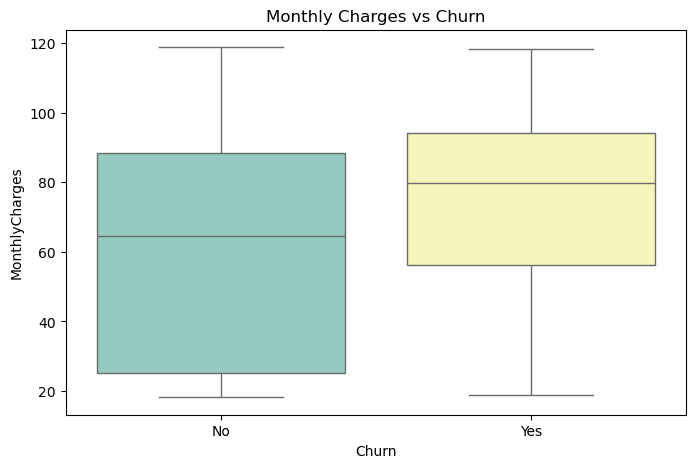

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set3', legend=False)
plt.title('Monthly Charges vs Churn')
plt.show()

### INSIGHTS:

Customers who churn pay higher monthly charges

The median monthly charge for churned customers is higher (80 USD) compared to non-churn customers (65 USD).

The box for the churn = Yes group lies higher on the y-axis.

 ### Churn rate by Contract Type

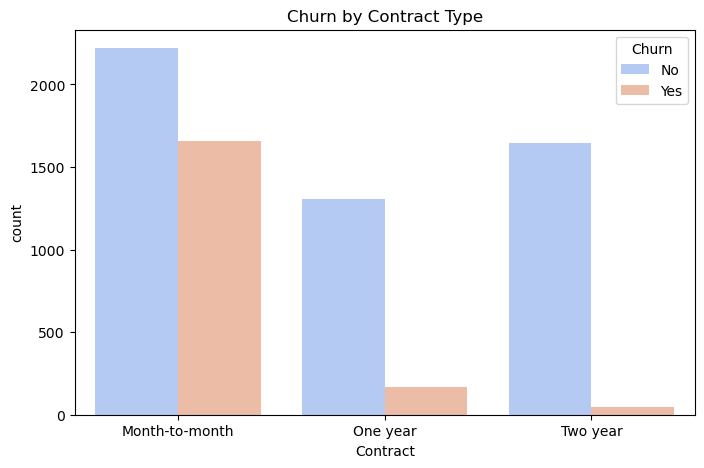

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn by Contract Type')
plt.show()

### Insight:

Churn by Contract Type (Bivariate Analysis)

This visualization compares churn behavior across different contract types:

Month-to-month

One year

Two year

### MULTIVARIATE ANALYSIS

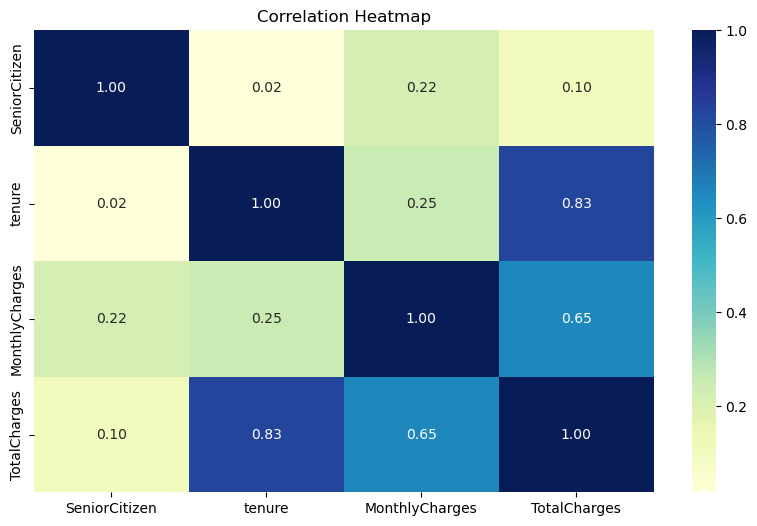

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### INSIGHTS:

1. tenure and TotalCharges have a strong positive correlation (0.83)

The longer a customer stays, the more they are billed over time.

Makes logical sense:

More tenure = more money spent.


2. MonthlyCharges and TotalCharges show moderate correlation (0.65)

If monthly charges are high, total charges also tend to be high (unless the customer churns early).

Indicates customers with high billing are financially valuable — but may also be sensitive to pricing.

In [20]:
print("\nFinal dataset shape:", df.shape)
print("Null values:\n", df.isnull().sum())


Final dataset shape: (7043, 20)
Null values:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## DATA PREPROCESSING

In [21]:
# Separate features (X) and target (y)
# Assuming 'Churn' is the target column 
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convert categorical columns to numeric (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

In [22]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale / Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

Training set shape: (5634, 30)
Testing set shape: (1409, 30)


### INSIGHTS:

You have 5,634 records used for training

1,409 records reserved for testing

Each record has 30 features (after encoding)

## Model Training

### Logistic Regression

In [23]:
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model',LogisticRegression(max_iter=5000, class_weight='balanced'))  # increased max_iter
])

log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log, pos_label='Yes', zero_division=0)
rec_log = recall_score(y_test, y_pred_log, pos_label='Yes', zero_division=0)
f1_log = f1_score(y_test, y_pred_log, pos_label='Yes', zero_division=0)

print(f"Accuracy: {acc_log:.4f}, Precision: {prec_log:.4f}, Recall: {rec_log:.4f}, F1-Score: {f1_log:.4f}\n")

Accuracy: 0.7473, Precision: 0.5142, Recall: 0.8231, F1-Score: 0.6330



### INSIGHTS

1) Logistic Regression gives good accuracy but struggles with capturing all churn customers (lower recall).

This means:

The model is cautious — predicts churn only when highly confident.

It misses some churners → may not be ideal if business priority is customer retention.

2) Precision (68%)

Out of customers predicted as churn, 68% were actually churners.

### Support Vector Machine (SVM)

In [24]:
svm_model = Pipeline([
    ('scaler', StandardScaler()),                    
    ('model', SVC(kernel='rbf',probability=True,class_weight='balanced', C=1,gamma='scale'))                     
])

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, pos_label='Yes', zero_division=0)
rec_svm = recall_score(y_test, y_pred_svm, pos_label='Yes', zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, pos_label='Yes', zero_division=0)

print(f"Accuracy: {acc_svm:.4f}, Precision: {prec_svm:.4f}, Recall: {rec_svm:.4f}, F1-Score: {f1_svm:.4f}\n")

Accuracy: 0.7509, Precision: 0.5191, Recall: 0.8016, F1-Score: 0.6301



### INSIGHTS:

1) The model is excellent at identifying customers who are likely to churn.

Recall = 80%, meaning:

Out of all customers who actually churned, the model successfully detected 80% of them.

2) Precision is moderate (52%).

Meaning half of the customers predicted as churn may actually not churn.

3) Balanced performance due to class_weight='balanced'

### K-Nearest Neighbors (KNN)

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn,pos_label='Yes', zero_division=0)
rec_knn = recall_score(y_test, y_pred_knn,pos_label='Yes', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn,pos_label='Yes', zero_division=0)

print("KNN Results:")
print(f"Accuracy: {acc_knn:.4f}, Precision: {prec_knn:.4f}, Recall: {rec_knn:.4f}, F1-Score: {f1_knn:.4f}\n")

KNN Results:
Accuracy: 0.7771, Precision: 0.5974, Recall: 0.4853, F1-Score: 0.5355



### INSIGHTS:

1) Decent overall accuracy (≈ 78%)

KNN performs well at classifying both churn and non-churn customers when looking at total accuracy.

2) Higher Precision than SVM and Logistic Regression

Precision = ~60%

That means:

When KNN predicts a customer will churn, it is correct 60% of the time.

3) Low Recall (≈ 49%)

KNN misses over half of the actual churners.

4) KNN struggles with imbalanced data

The dataset has many "No churn" cases compared to "Yes".

Since KNN relies on distances to neighbors, it tends to get biased toward the majority class.

### Decision Tree

In [26]:
dt_model = DecisionTreeClassifier(max_depth=6, min_samples_split=50,min_samples_leaf=20,class_weight='balanced',random_state=42
)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt,pos_label='Yes', zero_division=0)
rec_dt = recall_score(y_test, y_pred_dt,pos_label='Yes', zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt,pos_label='Yes', zero_division=0)

print("Decision Tree Results:")
print(f"Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {rec_dt:.4f}, F1-Score: {f1_dt:.4f}\n")

Decision Tree Results:
Accuracy: 0.7211, Precision: 0.4847, Recall: 0.8499, F1-Score: 0.6173



### INSIGHTS:

1) The tuned Decision Tree is now excellent at detecting customers who are likely to churn.

Recall of 85%

2) Reduced Overfitting

Tuned parameters (max_depth, min_samples_split, min_samples_leaf) helped the tree generalize better.

The model no longer memorizes data — it analyzes patterns more intelligently.

3) Balanced Churn Classification

class_weight='balanced' forces the model to treat churn and non-churn customers equally.    

### Random Forest

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf,pos_label='Yes', zero_division=0)
rec_rf = recall_score(y_test, y_pred_rf,pos_label='Yes', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf,pos_label='Yes', zero_division=0)

print("Random Forest Results:")
print(f"Accuracy: {acc_rf:.4f}, Precision: {prec_rf:.4f}, Recall: {rec_rf:.4f}, F1-Score: {f1_rf:.4f}\n")

Random Forest Results:
Accuracy: 0.7892, Precision: 0.6429, Recall: 0.4584, F1-Score: 0.5352



### INSIGHTS:

1) Best Accuracy among tested models

The model predicts overall churn status correctly 79% of the time.

2) High Precision (64%)

When the model predicts a customer will churn, it is correct 64% of the time.

3) Low Recall (46%)

The model only detects 46 out of 100 actual churn customers → it misses more than half of potential churners.

### XGBoost

In [28]:
# Encode target labels 
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train XGBoost 
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate using encoded labels
acc_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
prec_xgb = precision_score(y_test_encoded, y_pred_xgb, zero_division=0)
rec_xgb = recall_score(y_test_encoded, y_pred_xgb, zero_division=0)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, zero_division=0)

print("XGBoost Results:")
print(f"Accuracy: {acc_xgb:.4f}, Precision: {prec_xgb:.4f}, Recall: {rec_xgb:.4f}, F1-Score: {f1_xgb:.4f}")

XGBoost Results:
Accuracy: 0.7892, Precision: 0.6284, Recall: 0.4987, F1-Score: 0.5561


### INSIGHTS:

1) Same Accuracy as Random Forest (~79%)

Overall performance is strong and consistent.

2) Better Recall than Random Forest

XGBoost detects ~50% of churn customers (vs 46% in Random Forest).

3) Balanced Precision & Recall

Precision and Recall are close (63% vs 50%).

F1-Score (56%) is highest among most models in your results.

4) Better handling of imbalance

XGBoost inherently focuses more on misclassified samples

5) More stable & robust model

Boosting reduces overfitting risk compared to Decision Tree.

# Model Comparison

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.747339   0.514238  0.823056  0.632990
1                  SVM  0.750887   0.519097  0.801609  0.630137
2                  KNN  0.777147   0.597360  0.485255  0.535503
3        Decision Tree  0.721079   0.484709  0.849866  0.617332
4        Random Forest  0.789212   0.642857  0.458445  0.535211
5              XGBoost  0.789212   0.628378  0.498660  0.556054


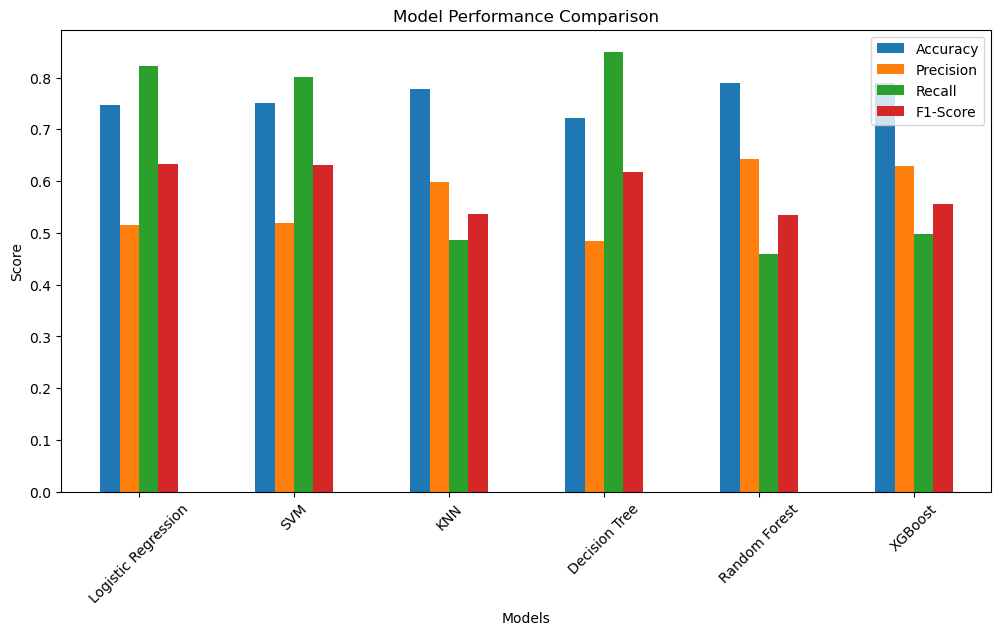

In [29]:
# Dictionary to store performance of each model
model_results = {
    "Model": ["Logistic Regression", "SVM", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [acc_log, acc_svm, acc_knn, acc_dt, acc_rf, acc_xgb],
    "Precision": [prec_log, prec_svm, prec_knn, prec_dt, prec_rf, prec_xgb],
    "Recall": [rec_log, rec_svm, rec_knn, rec_dt, rec_rf, rec_xgb],
    "F1-Score": [f1_log, f1_svm, f1_knn, f1_dt, f1_rf, f1_xgb]
}

# Convert dictionary to DataFrame
comparison_df = pd.DataFrame(model_results)

# Display comparison table
print(comparison_df)


#  Visualization — Compare Model Scores

comparison_df.plot(x="Model", figsize=(12, 6), kind="bar")
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Hyperparameter Tuning

In [30]:
# Encode target for XGBoost only (0/1)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=5000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ['l2'],
            "solver": ['lbfgs']
        },
        "target": y_train
    },

    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "kernel": ['rbf', 'poly'],
            "C": [0.1, 1, 10],
            "gamma": ['scale', 'auto']
        },
        "target": y_train
    },

    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ['uniform', 'distance']
        },
        "target": y_train
    },

    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [3, 5, 7, None],
            "min_samples_split": [2, 10, 20],
            "min_samples_leaf": [1, 5, 10]
        },
        "target": y_train
    },

    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 10],
            "min_samples_leaf": [1, 5]
        },
        "target": y_train
    },

    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss'),
        "params": {
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "n_estimators": [50, 100, 200]
        },
        "target": y_train_enc      #  numerical labels
    }
}

results = []
best_models = {}

for model_name, mp in models.items():
    
    grid = GridSearchCV(mp["model"], mp["params"], cv=3, scoring='f1')
    grid.fit(X_train_scaled, mp["target"])

    # store best model
    best_models[model_name] = grid.best_estimator_

    # predict 
    y_pred = (
        grid.predict(X_test_scaled)
        if model_name != "XGBoost"
        else grid.predict(X_test_scaled)
    )

    if model_name == "XGBoost":
        y_test_eval = y_test_enc
        pos = 1
    else:
        y_test_eval = y_test
        pos = 'Yes'

    acc = accuracy_score(y_test_eval, y_pred)
    prec = precision_score(y_test_eval, y_pred, pos_label=pos, zero_division=0)
    rec = recall_score(y_test_eval, y_pred, pos_label=pos, zero_division=0)
    f1 = f1_score(y_test_eval, y_pred, pos_label=pos, zero_division=0)

    results.append([model_name, acc, prec, rec, f1])

# comparison table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.822569   0.702970  0.571046  0.630178
1                  SVM  0.810504   0.730435  0.450402  0.557214
2                  KNN  0.765791   0.560563  0.533512  0.546703
3        Decision Tree  0.801987   0.706140  0.431635  0.535774
4        Random Forest  0.792761   0.651685  0.466488  0.543750
5              XGBoost  0.808375   0.667752  0.549598  0.602941


In [31]:
# Automatically Detect Best Model
best_model_name = results_df.iloc[0]['Model']
print(f" Best Model Detected: {best_model_name}\n")

 Best Model Detected: Logistic Regression



## Model Accuracy Comparison

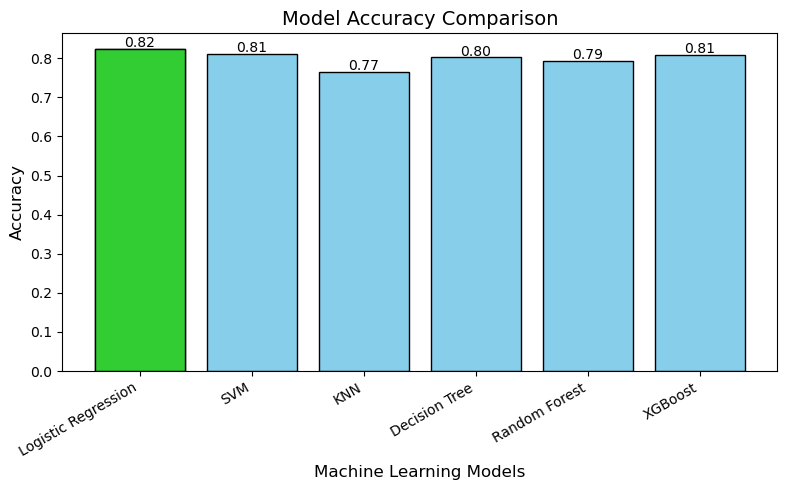


 Best Model: Logistic Regression with Accuracy = 0.8226


In [32]:
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue', edgecolor='black')
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=30, ha='right')

# Highlight best model
best_model = results_df.iloc[0]
plt.bar(best_model['Model'], best_model['Accuracy'], color='limegreen', edgecolor='black')

# Annotate accuracy values on top of bars
for i, row in results_df.iterrows():
    plt.text(i, row['Accuracy'] + 0.005, f"{row['Accuracy']:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n Best Model: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")